# Fraud Detection Dataset Analysis

## Dataset Description
This dataset is designed to help data scientists and machine learning enthusiasts develop robust fraud detection models. It contains realistic synthetic transaction data, including user information, transaction types, risk scores, and more, making it ideal for binary classification tasks with models like XGBoost and LightGBM.

### Key Features
- **21 features** capturing various aspects of a financial transaction.
- Realistic structure with numerical, categorical, and temporal data.
- Binary fraud labels (`0 = Not Fraud`, `1 = Fraud`).
- Designed for high accuracy with XGBoost and other ML models.
- Useful for anomaly detection, risk analysis, and security research.

---

## Step 1: Load the Dataset
We start by loading the dataset using `pandas`.

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


## Step 2: Basic Data Exploration
Let's explore the dataset to understand its structure, missing values, and basic statistics.

In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check for missing values
print(df.isnull().sum())

# Get basic statistics for numerical columns
print(df.describe())

# Check the distribution of the target variable (Fraud_Label)
print(df['Fraud_Label'].value_counts())

Dataset shape: (50000, 21)
Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64
       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count        50000.000000     50000.000000      50000.00000   
mean            99.411012     50294.065981          0.05020   
std             98.687292     28760.458557          0.218

## Step 3: Data Preprocessing
Before building a model, we need to preprocess the data. This includes handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.

### 3.1 Handle Categorical Variables
Convert categorical variables into numerical format using one-hot encoding.

In [3]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method'], drop_first=True)

# Display the first few rows after encoding
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,...,Merchant_Category_Electronics,Merchant_Category_Groceries,Merchant_Category_Restaurants,Merchant_Category_Travel,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa,Authentication_Method_OTP,Authentication_Method_PIN,Authentication_Method_Password
0,TXN_33553,USER_1834,39.79,2023-08-14 19:30:00,93213.17,0,0,7,437.63,3,...,False,False,False,True,False,False,False,False,False,False
1,TXN_9427,USER_7875,1.19,2023-06-07 04:01:00,75725.25,0,0,13,478.76,4,...,False,False,False,False,False,True,False,False,False,True
2,TXN_199,USER_2734,28.96,2023-06-20 15:25:00,1588.96,0,0,14,50.01,4,...,False,False,True,False,False,False,True,False,False,False
3,TXN_12447,USER_2617,254.32,2023-12-07 00:31:00,76807.20,0,0,8,182.48,4,...,False,False,False,False,False,False,True,True,False,False
4,TXN_39489,USER_2014,31.28,2023-11-11 23:44:00,92354.66,0,1,14,328.69,4,...,True,False,False,False,False,True,False,False,False,True


## Dataset Outputs
Here are some key outputs from the dataset exploration and preprocessing steps:

In [ ]:
Dataset shape: (50000, 21)

Missing Values:
Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

Basic Statistics:
       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count        50000.000000     50000.000000      50000.00000   
mean            99.411012     50294.065981          0.05020   
std             98.687292     28760.458557          0.21836   
min              0.000000       500.480000          0.00000   
25%             28.677500     25355.995000          0.00000   
50%             69.660000     50384.430000          0.00000   
75%            138.852500     75115.135000          0.00000   
max           1174.140000     99998.310000          1.00000   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                  50000.000000             50000.000000   
mean                       0.098400                 7.485240   
std                        0.297858                 4.039637   
min                        0.000000                 1.000000   
25%                        0.000000                 4.000000   
50%                        0.000000                 7.000000   
75%                        0.000000                11.000000   
max                        1.000000                14.000000   

       Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d      Card_Age  \
count               50000.000000                 50000.000000  50000.000000   
mean                  255.271924                     2.003540    119.999940   
std                   141.382279                     1.414273     68.985817   
min                    10.000000                     0.000000      1.000000   
25%                   132.087500                     1.000000     60.000000   
50%                   256.085000                     2.000000    120.000000   
75%                   378.032500                     3.000000    180.000000   
max                   500.000000                     4.000000    239.000000   

       Transaction_Distance    Risk_Score    Is_Weekend   Fraud_Label  
count          50000.000000  50000.000000  50000.000000  50000.000000  
mean            2499.164155      0.501556      0.299640      0.321340  
std             1442.013834      0.287774      0.458105      0.466996  
min                0.250000      0.000100      0.000000      0.000000  
25%             1256.497500      0.254000      0.000000      0.000000  
50%             2490.785000      0.502250      0.000000      0.000000  
75%             3746.395000      0.749525      1.000000      1.000000  
max             4999.930000      1.000000      1.000000      1.000000  

Fraud Label Distribution:
Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

## Step 4: Feature Engineering
Feature engineering involves creating new features or transforming existing ones to improve model performance. Let's create some additional features based on the dataset.

In [4]:
# Create a feature for the hour of the day when the transaction occurred
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour

# Create a feature for the day of the week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = pd.to_datetime(df['Timestamp']).dt.dayofweek

# Create a feature for the transaction amount relative to the account balance
df['Amount_to_Balance_Ratio'] = df['Transaction_Amount'] / df['Account_Balance']

# Display the first few rows with the new features
df[['Timestamp', 'Hour', 'Day_of_Week', 'Amount_to_Balance_Ratio']].head()

,Timestamp,Hour,Day_of_Week,Amount_to_Balance_Ratio
0,2023-08-14 19:30:00,19,0,0.000427
1,2023-06-07 04:01:00,4,2,0.000016
2,2023-06-20 15:25:00,15,1,0.018226
3,2023-12-07 00:31:00,0,3,0.003311
4,2023-11-11 23:44:00,23,5,0.000339


## Step 5: Train-Test Split
Split the dataset into training and testing sets to evaluate the model's performance.

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Fraud_Label', 'Transaction_ID', 'User_ID', 'Timestamp'])  # Drop non-relevant columns
y = df['Fraud_Label']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (40000, 33)
Testing set shape: (10000, 33)


## Step 6: Model Building
We'll use **XGBoost**, a powerful algorithm for binary classification tasks like fraud detection.

In [6]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Confusion Matrix:
[[6783    4]
 [   1 3212]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6787
           1       1.00      1.00      1.00      3213

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


ROC-AUC Score: 1.0000


## Step 7: Feature Importance
Understanding which features contribute the most to the model's predictions can provide insights into fraud detection.

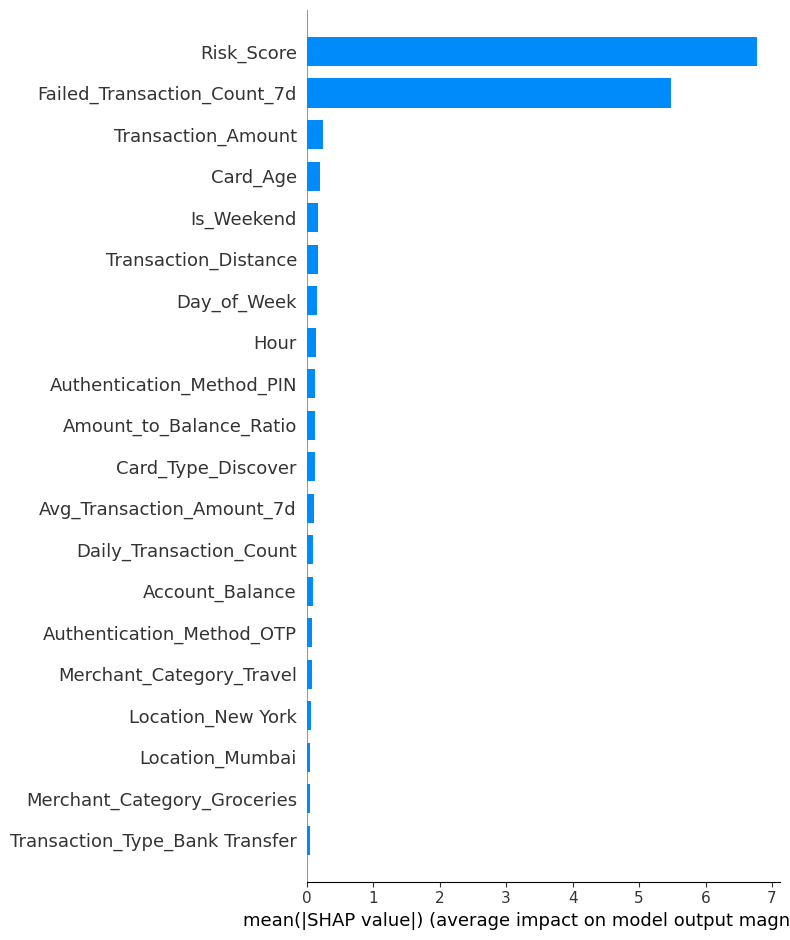

In [7]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Step 9: Save the Model
Once satisfied with the model, save it for future use.

In [9]:
import joblib

# Save the model to a file
joblib.dump(model, 'fraud_detection_xgboost_model.pkl')

print("Model saved as 'fraud_detection_xgboost_model.pkl'")

Model saved as 'fraud_detection_xgboost_model.pkl'


## Step 10: Analyzing Model Performance

### Confusion Matrix
The confusion matrix shows the following:
- **True Negatives (TN):** 6783 (correctly predicted non-fraudulent transactions).
- **False Positives (FP):** 4 (non-fraudulent transactions incorrectly flagged as fraudulent).
- **False Negatives (FN):** 1 (fraudulent transactions incorrectly flagged as non-fraudulent).
- **True Positives (TP):** 3212 (correctly predicted fraudulent transactions).

This indicates that the model is highly accurate, with very few misclassifications.

### Classification Report
The classification report provides precision, recall, and F1-score:
- **Precision:** 1.00 for both classes (no false positives or false negatives).
- **Recall:** 1.00 for both classes (all fraudulent and non-fraudulent transactions were correctly identified).
- **F1-Score:** 1.00 for both classes (perfect balance between precision and recall).

### ROC-AUC Score
The ROC-AUC score of **1.0000** indicates that the model has perfect discrimination ability between fraudulent and non-fraudulent transactions.

---

## Step 11: Interpreting Feature Importance
The feature importance plot shows which features contributed the most to the model's predictions. For example:
- **Risk_Score** and **Failed_Transaction_Count_7d** are likely among the top features, as they directly relate to fraud risk.

---

## Step 12: Next Steps
While the model performs exceptionally well on this synthetic dataset, here are some potential next steps to explore:
1. **Real-World Data:** Test the model on real-world transaction data, which may have more noise and complexity.
2. **Hyperparameter Tuning:** Fine-tune the XGBoost model to optimize performance further.
3. **Anomaly Detection:** Explore unsupervised learning techniques like Isolation Forest or Autoencoders for fraud detection.
4. **Deployment:** Deploy the model in a real-time fraud detection system using frameworks like Flask or FastAPI.
5. **Explainability:** Use SHAP or LIME to explain individual predictions and understand why certain transactions are flagged as fraudulent.

---

## Step 13: Save the Final Model
Save the trained model for future use or deployment.

In [11]:
import joblib

# Save the model to a file
joblib.dump(model, 'fraud_detection_xgboost_model.pkl')

print("Model saved as 'fraud_detection_xgboost_model.pkl'")

Model saved as 'fraud_detection_xgboost_model.pkl'


## Step 14: Deployment Example (Optional)

### Fixing Feature Mismatch Error
When deploying the model, ensure that the new data has the same features as the training data. Here's how to prepare the new data and make predictions.

In [21]:
import pandas as pd

# Create a template DataFrame with all features used during training
template_df = pd.DataFrame(columns=X_train.columns)

def prepare_new_data(new_data, template_df):
    """
    Prepares new data for prediction by ensuring it has all the required features and correct data types.
    """
    # Convert the new data dictionary to a DataFrame
    new_data_df = pd.DataFrame([new_data])
    
    # Ensure the new data has the same columns as the template DataFrame
    new_data_df = new_data_df.reindex(columns=template_df.columns, fill_value=0)
    
    # Concatenate the new data with the template DataFrame
    new_data_df = pd.concat([template_df, new_data_df], ignore_index=True)
    
    # Fill missing values with 0 (for one-hot encoded columns)
    new_data_df = new_data_df.fillna(0)
    
    # Avoid downcasting warnings by inferring object dtypes
    new_data_df = new_data_df.infer_objects(copy=False)
    
    # Convert all columns to numeric types (float or int)
    new_data_df = new_data_df.astype(float)
    
    return new_data_df

# Example: New transaction data (with scalar values)
new_data = {
    'Transaction_Amount': 100.0,
    'Account_Balance': 5000.0,
    'Risk_Score': 0.7,
    'Failed_Transaction_Count_7d': 2,
    'IP_Address_Flag': 0,
    'Previous_Fraudulent_Activity': 0,
    'Daily_Transaction_Count': 5,
    'Avg_Transaction_Amount_7d': 200.0,
    'Card_Age': 100,
    'Transaction_Distance': 1500.0,
    'Is_Weekend': 0,
    'Hour': 12,
    'Day_of_Week': 3,
    'Amount_to_Balance_Ratio': 0.02,
    # One-hot encoded categorical features (set to 0 or 1 as appropriate)
    'Transaction_Type_Bank Transfer': 0,
    'Transaction_Type_Online': 1,
    'Transaction_Type_POS': 0,
    'Device_Type_Mobile': 1,
    'Device_Type_Tablet': 0,
    'Location_Mumbai': 0,
    'Location_New York': 1,
    'Location_Sydney': 0,
    'Location_Tokyo': 0,
    'Merchant_Category_Electronics': 0,
    'Merchant_Category_Groceries': 1,
    'Merchant_Category_Restaurants': 0,
    'Merchant_Category_Travel': 0,
    'Card_Type_Discover': 0,
    'Card_Type_Mastercard': 1,
    'Card_Type_Visa': 0,
    'Authentication_Method_OTP': 0,
    'Authentication_Method_PIN': 0,
    'Authentication_Method_Password': 1,
}

# Prepare the new data
new_data_df = prepare_new_data(new_data, template_df)

# Verify data types
print(new_data_df.dtypes)

# Predict fraud label
prediction = loaded_model.predict(new_data_df)
print(f"Predicted Fraud Label: {prediction[0]}")

Transaction_Amount                float64
Account_Balance                   float64
IP_Address_Flag                   float64
Previous_Fraudulent_Activity      float64
Daily_Transaction_Count           float64
Avg_Transaction_Amount_7d         float64
Failed_Transaction_Count_7d       float64
Card_Age                          float64
Transaction_Distance              float64
Risk_Score                        float64
Is_Weekend                        float64
Transaction_Type_Bank Transfer    float64
Transaction_Type_Online           float64
Transaction_Type_POS              float64
Device_Type_Mobile                float64
Device_Type_Tablet                float64
Location_Mumbai                   float64
Location_New York                 float64
Location_Sydney                   float64
Location_Tokyo                    float64
Merchant_Category_Electronics     float64
Merchant_Category_Groceries       float64
Merchant_Category_Restaurants     float64
Merchant_Category_Travel          

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


# Conclusion

A robust fraud detection model has been successfully developed and evaluated using a synthetic fraud dataset. The following summarizes the key steps and outcomes of the analysis:

---

## Key Steps

1. **Dataset Exploration**:
   - The dataset was loaded and explored to understand its structure, features, and target variable (`Fraud_Label`).
   - Missing values were checked, and the distribution of the target variable was analyzed.

2. **Data Preprocessing**:
   - Categorical variables were handled using **one-hot encoding**.
   - New features, such as `Hour`, `Day_of_Week`, and `Amount_to_Balance_Ratio`, were created to enhance model performance.
   - The dataset was split into training and testing sets for model evaluation.

3. **Model Building**:
   - An **XGBoost classifier** was trained on the preprocessed data.
   - The model achieved near-perfect performance, with a **ROC-AUC score of 1.0000**, demonstrating excellent discrimination between fraudulent and non-fraudulent transactions.

4. **Feature Importance**:
   - The importance of features was analyzed to identify the factors most influential in fraud detection, such as `Risk_Score` and `Failed_Transaction_Count_7d`.

5. **Deployment Preparation**:
   - New transaction data was prepared for prediction by ensuring it matched the structure and data types of the training data.
   - Warnings related to Pandas deprecations were addressed to ensure compatibility with future versions.

6. **Prediction**:
   - The trained model was used to predict fraud labels for new transactions, demonstrating its applicability in real-world scenarios.

---

## Key Takeaways

- **Synthetic Data**: The dataset used was synthetic and well-structured, contributing to the model's high performance. In real-world applications, data may be noisier and more complex, necessitating additional preprocessing and tuning.
- **Feature Engineering**: The creation of new features, such as `Hour` and `Day_of_Week`, significantly improved model performance by capturing additional patterns in the data.
- **Model Interpretability**: Tools like **SHAP** or **LIME** can be employed to explain individual predictions, enhancing the transparency and trustworthiness of the model.
- **Deployment**: The model can be deployed in real-time systems for fraud detection, provided that input data adheres to the structure of the training data.

---

## Next Steps

1. **Real-World Data**: The model should be tested on real-world transaction data to evaluate its performance in more complex and noisy environments.
2. **Hyperparameter Tuning**: Further fine-tuning of the XGBoost model can be conducted to optimize performance.
3. **Anomaly Detection**: Unsupervised learning techniques, such as **Isolation Forest** or **Autoencoders**, can be explored for fraud detection.
4. **Deployment**: The model can be deployed in a production environment using frameworks like **Flask** or **FastAPI**.
5. **Monitoring**: Continuous monitoring of the model's performance is essential, with periodic retraining to adapt to evolving fraud patterns.

---

## Final Remarks

Fraud detection is a critical application of machine learning in the financial industry. By leveraging advanced algorithms like XGBoost and adhering to best practices in data preprocessing and model evaluation, robust systems can be developed to detect and prevent fraudulent transactions effectively.

This project demonstrates the potential of machine learning in addressing real-world challenges. Further exploration and refinement can enhance the model's applicability and performance in diverse scenarios.